In [ ]:
#This project focuses on working with dict() in Python
# DATA MINING FOR THE DATA SET OF US_births_1994-2003_CDC_NCHS.csv

In [1]:
#Using open() and read() to read in the text
f = open("US_births_1994-2003_CDC_NCHS.csv","r")
text = f.read()
line_text = text.split("\n")
print(line_text[0:10])

['year,month,date_of_month,day_of_week,births', '1994,1,1,6,8096', '1994,1,2,7,7772', '1994,1,3,1,10142', '1994,1,4,2,11248', '1994,1,5,3,11053', '1994,1,6,4,11406', '1994,1,7,5,11251', '1994,1,8,6,8653', '1994,1,9,7,7910']


In [2]:
#Function to read in the text and split the string
def read_csv(file_name):
    string_data = open(file_name).read()
    string_list = string_data.split("\n")[1:]
    final_list=[]
    for i in string_list:
        int_fields=[]
        string_fields=i.split(",")
        for j in string_fields:
            int_fields.append(int(j))
        final_list.append(int_fields)
    return final_list

cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
print (cdc_list[0:10])
    

[[1994, 1, 1, 6, 8096], [1994, 1, 2, 7, 7772], [1994, 1, 3, 1, 10142], [1994, 1, 4, 2, 11248], [1994, 1, 5, 3, 11053], [1994, 1, 6, 4, 11406], [1994, 1, 7, 5, 11251], [1994, 1, 8, 6, 8653], [1994, 1, 9, 7, 7910], [1994, 1, 10, 1, 10498]]


In [3]:
#Function to extract the month of births
def month_births(name_list):
    births_per_month={}
    for i in name_list:
        month = i[1]
        births =int(i[4])
        if month in births_per_month:
            births_per_month[month] = births_per_month[month] + births
        else:
            births_per_month[month] = births
    return births_per_month

cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [4]:
#Function to extract dates of births
def dow_births(date_list):
    week_birth = dict()
    
    for i in date_list:
        date_week = i[3]
        births =int(i[4])
        if date_week in week_birth:
            week_birth[date_week] = week_birth[date_week] + births
        else:
            week_birth[date_week] = births
    return week_birth

cdc_day_births = dow_births(cdc_list)
cdc_day_births
        
    
    
    

{1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657,
 6: 4562111,
 7: 4079723}

In [5]:
#Function to value_count
def calc_counts(data,column):
    general_birth = dict()
    for i in data:
        att = i[column]
        births = int(i[4])
        if att in general_birth:
            general_birth[att] = general_birth[att] + births
        else:
            general_birth[att] = births
    return general_birth
cdc_year_births = calc_counts(cdc_list,0)
cdc_month_births = calc_counts(cdc_list,1)
cdc_dom_births = calc_counts(cdc_list,2)
cdc_dow_births = calc_counts(cdc_list,3)



In [8]:
#let's examine how many births in each month
cdc_month_births


{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [9]:
#Let's examine how many births in each day of the month
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

BELOWS, WE WILL BE USING PANDAS TO MINE THE DATASET

In [1]:
#Using pandas to import the text
import pandas as pd
input_path ='/Users/phuph/Documents/GitHub/Phu-PythonProject/US_births_1994-2003_CDC_NCHS.csv'
text_pd = pd.read_csv(input_path)
text_pd.describe()
text_pd[0:5]

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [3]:
text_pd["year"]["births"].sum()

KeyError: 'births'

In [81]:
cdc_year = text_pd.groupby('year', as_index=False)['births'].sum()
#cdc_year_test = cdc_year[['year']]
#cdc_year_
type(cdc_year)
cdc_year['births']
#df.groupby('a').agg({'b':lambda x: list(x)}
#cdc_year.columns=['year','birth']
#Y_train = training_set[['label']].values




0    3952767
1    3899589
2    3891494
3    3880894
4    3941553
5    3959417
6    4058814
7    4025933
8    4021726
9    4089950
Name: births, dtype: int64

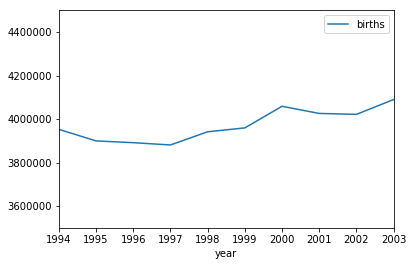

In [103]:
import matplotlib.pylab as plt
%matplotlib inline

cdc_year.plot(x=cdc_year['year'],y=1,ylim=[3500000,4500000])